# <center>**Online Shoppers Purchasing Intention**</center>
***

### Kelompok LAMBA :
Abdul Ghofur <br>
Angeline Shirley<br>
Dzaky Fachrezi<br>
Iqbal Octoryaz<br>
M. Tohar Sagara<br>
Rahma Yanti<br>
Syofwan Aldia<br>
Widi Bagaskara

## **About Dataset**
***

Dataset Online Shoppers Purchasing Intention terdiri dari 18 features yang dikelompokan berdasarkan tipe data nya : <br>

| **Numerical data**     | **Categorical data**|
|----------------------- |------------- |
|Administrative | OperatingSystems|
|Administrative_Duration | Browser|
|Informational | Region|
|Informational_Duration | TrafficType|
|ProductRelated | Month|
|ProductRelated_Duration | VisitorType|
|BounceRates | Weekend |
|ExitRates | Revenue|
|PageValues |
|SpecialDay |

***
## **Data Pre-Processing**
***

## **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split

In [3]:
!pip install imblearn

## **Read Dataset**

In [4]:
df_ol_shop = pd.read_csv('./Data/online_shoppers_intention.csv')

df_ol_shop.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1109,0,0.0,0,0.0,5,94.500000,0.000000,0.040000,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
1090,0,0.0,0,0.0,21,1129.000000,0.009524,0.038095,0.0,0.0,Mar,2,5,5,1,Returning_Visitor,False,False
541,0,0.0,0,0.0,30,484.672619,0.000000,0.018966,0.0,0.0,Mar,2,6,7,1,Returning_Visitor,False,False
9246,0,0.0,0,0.0,7,512.250000,0.000000,0.014286,0.0,0.0,Dec,3,2,1,11,New_Visitor,False,False
9896,0,0.0,0,0.0,3,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,1,1,3,Returning_Visitor,False,False


## **1. Data Cleansing**
***

#### A. Missing Handle Value


In [5]:
df_ol_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Check missing value foreach column 

df_ol_shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Tidak terdapat missing value, sehingga tidak perlu handdling missing value.

#### B. Handle duplicated data

In [7]:
# Check total duplicate

df_ol_shop.duplicated().sum()

125

In [8]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df_ol_shop.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [9]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

##### Menghapus data duplicates

#### C. Handle outliers

In [10]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

In [11]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Menggunakan Zscore

In [12]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))

filtered_entries = np.array([True] * len(df_ol_shop_2))
# print(filtered_entries)

for col in nums:
    zscore = abs(stats.zscore(df_ol_shop_2[col]))
    # print(zscore)
    filtered_entries = (zscore < 3) & filtered_entries
    # print(filtered_entries)

df_ol_shop_zscore = df_ol_shop_2[filtered_entries]
print('Data sesudah handling outlier: ', len(df_ol_shop_zscore))

Data Sebelum handling outlier:  12205
Data sesudah handling outlier:  10020


##### Menggunakan IQR

In [13]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    Q1 = df_ol_shop_2[col].quantile(0.25)
    Q3 = df_ol_shop_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_iqr = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_iqr)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5044


#### Menggunakan Flooring and Capping

In [14]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    low_limit = df_ol_shop_2[col].quantile(0.10)
    high_limit = df_ol_shop_2[col].quantile(0.90)
    

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_flor_cap = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_flor_cap)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5150


##### Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020, sedangkan menggunakan IQR dan Flooring and Capping terlalu banyak data yang dihapus. Oleh Karena itu tidak perlu dilakukan handling outlier(penghapusan data outlier), melainkan dilakukan feature transformation saja

#### D. Feature transformation

##### Data sebaran sebelum dilakukan Feature transformation

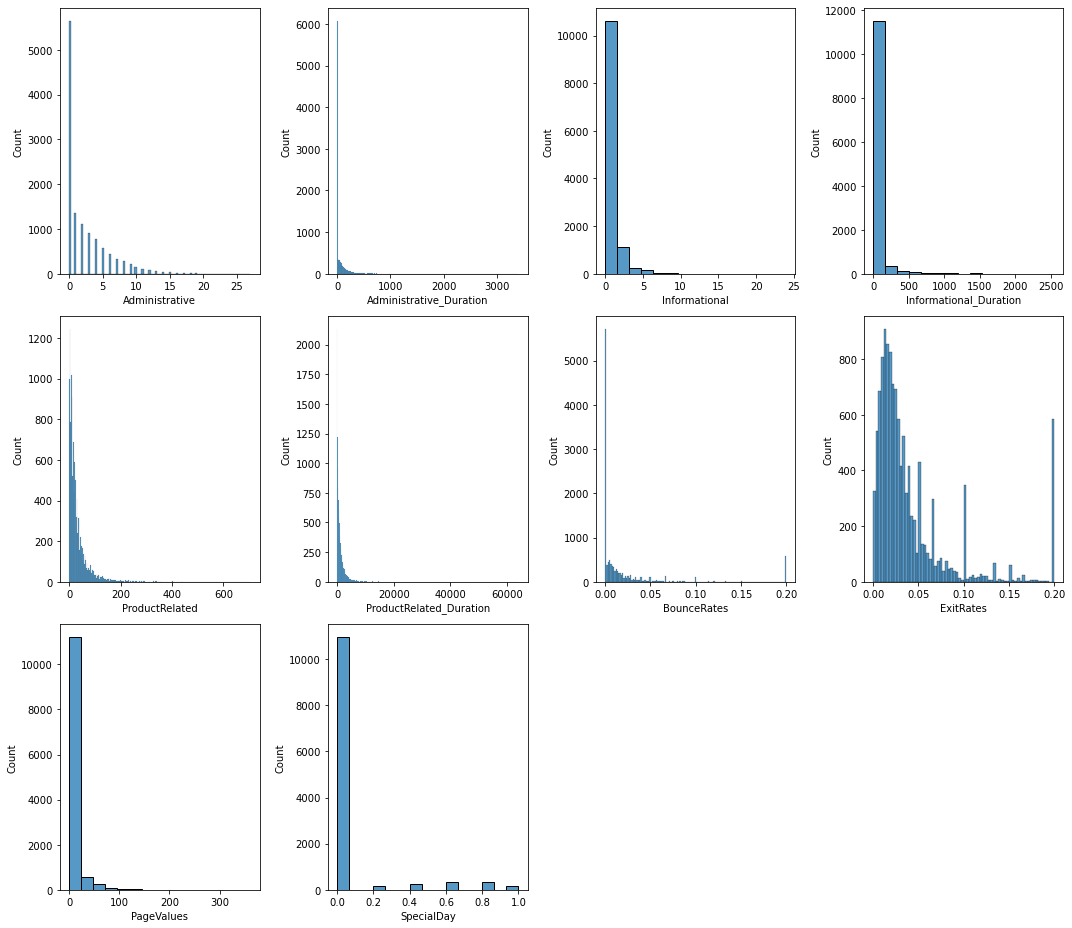

In [15]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2, x=nums[i]) # 
    plt.tight_layout()

#### Menggunakan Robust Scaler

In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [17]:
df_ol_shop_robust_scaler = df_ol_shop_2.copy()

df_ol_shop_robust_scaler.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12126,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True,False
1296,4,52.0,1,7.0,46,3087.000000,0.003774,0.021384,16.946438,0.0,Mar,2,2,3,8,Returning_Visitor,False,True
3580,0,0.0,0,0.0,4,59.000000,0.125000,0.175000,0.000000,0.8,May,2,2,4,1,Returning_Visitor,False,False
3945,0,0.0,0,0.0,24,805.000000,0.000000,0.008696,53.988000,0.0,May,2,2,1,2,New_Visitor,True,True
7193,7,144.8,1,96.2,34,1374.630952,0.019974,0.028025,0.000000,0.0,Jul,1,1,3,4,Returning_Visitor,False,False


In [18]:
nums_robust = []
for col in nums:
    col_name = 'robust_' + col
    nums_robust.append(col_name)
    df_ol_shop_robust_scaler[col_name] = scaler.fit_transform(df_ol_shop_robust_scaler[col].values.reshape(len(df_ol_shop_robust_scaler), 1))
    df_ol_shop_robust_scaler = df_ol_shop_robust_scaler.drop(columns=col)

df_ol_shop_robust_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,robust_Administrative,robust_Administrative_Duration,robust_Informational,robust_Informational_Duration,robust_ProductRelated,robust_ProductRelated_Duration,robust_BounceRates,robust_ExitRates,robust_PageValues,robust_SpecialDay
599,Mar,2,4,2,8,New_Visitor,False,True,0.00,0.263992,0.0,0.0,-0.366667,-0.334806,-0.173913,0.104128,53.134286,0.0
544,Mar,2,2,1,1,Returning_Visitor,False,False,2.75,0.765576,0.0,0.0,1.433333,1.241000,0.173913,-0.228761,0.000000,0.0
2525,May,1,1,3,3,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.0,-0.500000,-0.301321,7.826087,3.158550,0.000000,0.0
5066,May,2,5,4,4,Returning_Visitor,False,False,0.50,0.179514,0.0,0.0,2.233333,0.124251,-0.173913,-0.559385,0.000000,0.0
5742,Nov,2,2,5,6,Returning_Visitor,False,False,1.25,6.569243,3.0,7.6,0.333333,1.164681,0.257459,0.270391,35.515190,0.0


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Robust Scaler

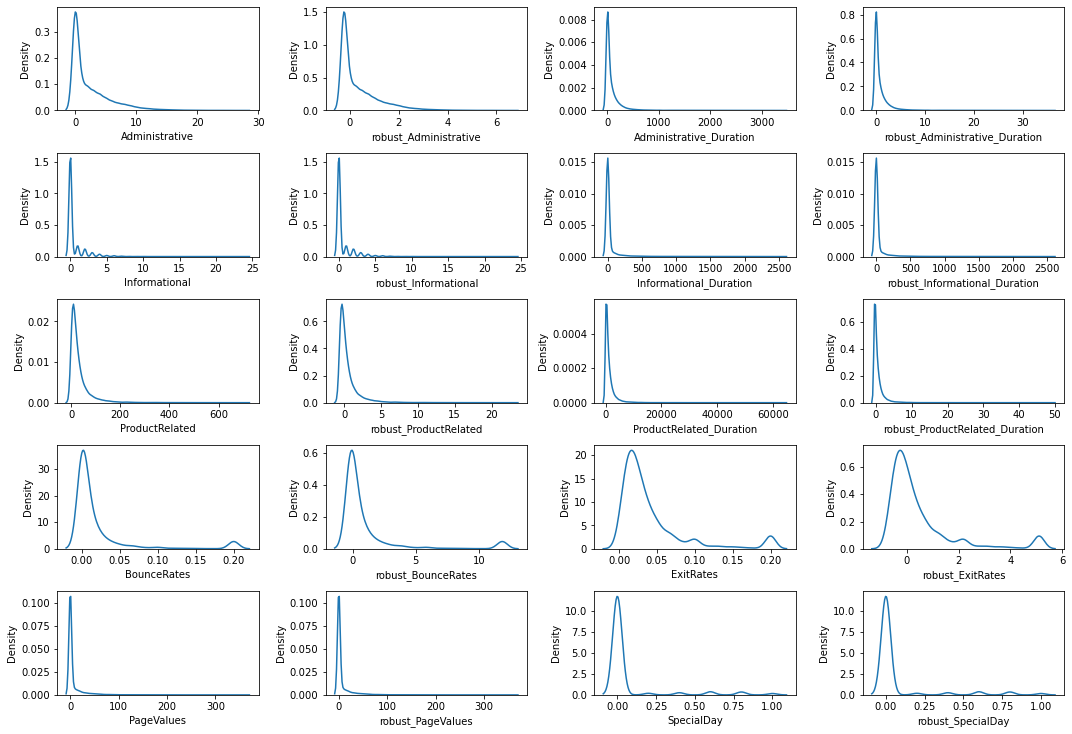

In [19]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_robust_scaler, x=nums_robust[i])

    plt.tight_layout()

##### Menggunakan Log Transformation

In [20]:
df_ol_shop_log_transformation = df_ol_shop_2.copy()

df_ol_shop_log_transformation.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1659,3,78.000000,0,0.0,11,369.166667,0.000000,0.023077,0.000000,0.0,Mar,3,2,3,1,Returning_Visitor,True,False
2574,5,106.321429,4,189.0,37,1306.028022,0.004264,0.010939,33.333581,0.0,May,2,4,1,3,Returning_Visitor,False,False
3326,0,0.000000,0,0.0,23,282.500000,0.043478,0.073913,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
3765,2,72.500000,0,0.0,10,1580.000000,0.000000,0.018182,100.096364,0.0,May,2,2,1,2,Returning_Visitor,False,True
6385,0,0.000000,0,0.0,4,98.600000,0.000000,0.050000,0.000000,0.0,Jul,2,2,5,1,Returning_Visitor,False,False


In [21]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    # np.log(df.mask(df <=0)).fillna(0)
    df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col])
    # df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col].mask(df_ol_shop_log_transformation[col] <= 0)).fillna(0)
    df_ol_shop_log_transformation = df_ol_shop_log_transformation.drop(columns=col)

# print(nums_log)
df_ol_shop_log_transformation.sample(5)


C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\syofw\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in l

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
6774,June,2,2,3,1,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,1.609438,3.742420,-inf,-3.218876,-inf,-inf
7048,Aug,3,2,1,2,Returning_Visitor,True,False,2.708050,5.946328,0.693147,3.072693,3.465736,7.449142,-5.347107,-4.566949,-inf,-inf
2348,May,2,10,2,1,Returning_Visitor,True,False,1.791759,5.965506,1.098612,6.300786,4.174387,7.432951,-4.223803,-3.361837,2.614588,0.000000
10643,Nov,2,2,1,1,Returning_Visitor,False,False,1.098612,1.945910,0.000000,3.225520,3.044522,6.100319,-3.960813,-3.449988,3.477804,-inf
3099,May,1,1,3,2,Returning_Visitor,False,False,0.693147,3.091042,-inf,-inf,3.091042,6.238422,-3.129264,-2.586570,-inf,-0.510826


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

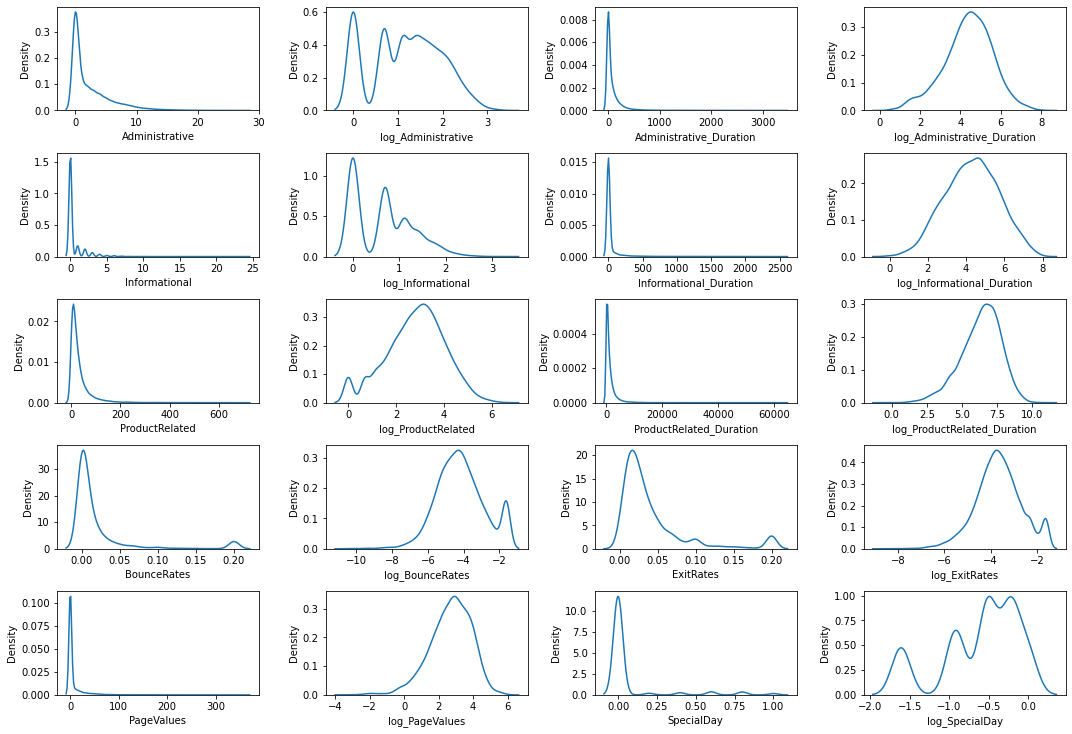

In [22]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_log_transformation, x=nums_log[i])

    plt.tight_layout()

#### Menggunakan Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [24]:
df_ol_shop_std_scaler = df_ol_shop_2.copy()

In [25]:
nums_std = []
for col in nums:
    col_name = 'std_' + col
    nums_std.append(col_name)
    df_ol_shop_std_scaler[col_name] = standar_scaler.fit_transform(df_ol_shop_std_scaler[col].values.reshape(len(df_ol_shop_std_scaler), 1))
    df_ol_shop_std_scaler = df_ol_shop_std_scaler.drop(columns=col)

df_ol_shop_std_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,std_Administrative,std_Administrative_Duration,std_Informational,std_Informational_Duration,std_ProductRelated,std_ProductRelated_Duration,std_BounceRates,std_ExitRates,std_PageValues,std_SpecialDay
5382,Nov,1,1,6,1,Returning_Visitor,False,False,0.498791,0.690503,-0.398824,-0.246257,-0.023449,-0.288929,-0.182286,-0.548170,-0.318962,-0.31024
10463,Nov,2,2,4,3,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.471962,0.453117,0.353415,0.874174,-0.318962,-0.31024
351,Mar,2,2,2,1,Returning_Visitor,False,False,0.198517,0.013261,-0.398824,-0.246257,-0.113152,-0.287085,-0.450137,-0.657581,-0.318962,-0.31024
8439,Nov,2,2,1,2,Returning_Visitor,False,True,0.799064,-0.111397,-0.398824,-0.246257,2.959161,1.658175,-0.423986,-0.678380,0.038314,-0.31024
3542,May,2,2,6,1,Returning_Visitor,False,False,-0.402029,-0.054350,-0.398824,-0.246257,-0.494387,-0.450103,-0.450137,-0.465018,-0.318962,-0.31024


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Standardization

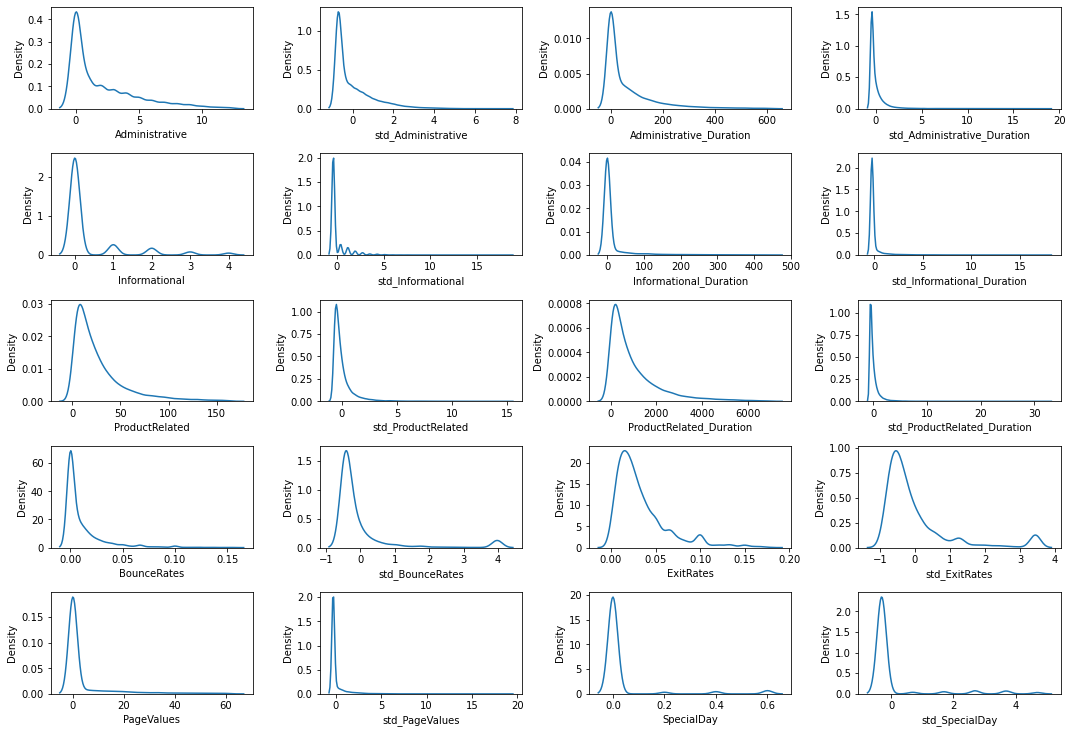

In [26]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_std_scaler, x=nums_std[i])

    plt.tight_layout()

#### Menggunakan Yeo - Jonshon

In [27]:
from sklearn.preprocessing import PowerTransformer
scaler_yeo_jonshon = PowerTransformer(method='yeo-johnson')

In [28]:
df_ol_shop_yeo_jo = df_ol_shop_2.copy()
df_ol_shop_yeo_jo.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3664,0,0.0,0,0.0,66,6100.527778,0.010606,0.046263,0.0,0.8,May,2,5,2,6,Returning_Visitor,False,False
3143,3,108.5,0,0.0,2,74.666667,0.000000,0.016667,0.0,0.8,May,3,2,3,2,Returning_Visitor,False,False
11646,0,0.0,0,0.0,3,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
4752,0,0.0,0,0.0,10,377.500000,0.020000,0.060000,0.0,0.0,May,1,1,2,11,Returning_Visitor,True,False
5193,1,48.0,0,0.0,26,1066.666667,0.025000,0.042024,0.0,0.0,May,3,2,8,11,Returning_Visitor,False,False


In [29]:
nums_yj = []
for col in nums:
    col_name = 'yj_' + col
    nums_yj.append(col_name)
    df_ol_shop_yeo_jo[col_name] = scaler_yeo_jonshon.fit_transform(df_ol_shop_yeo_jo[col].values.reshape(len(df_ol_shop_yeo_jo), 1))
    df_ol_shop_yeo_jo = df_ol_shop_yeo_jo.drop(columns=col)

df_ol_shop_yeo_jo.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
2094,May,3,2,3,3,Returning_Visitor,False,False,1.028024,0.964518,-0.523851,-0.494799,0.071770,0.460100,0.333159,-0.155438,1.963657,-0.33763
11285,Nov,2,2,3,1,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-1.024752,1.382304,1.150838,-0.532801,-0.33763
5879,Oct,3,2,1,2,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.025421,-0.192025,-0.802948,-0.038342,-0.532801,-0.33763
11433,Nov,2,2,7,13,Returning_Visitor,True,False,1.446582,1.058373,1.979993,2.072785,1.552210,1.116279,-0.590017,-0.901521,-0.532801,-0.33763
9942,Nov,1,2,9,2,New_Visitor,False,True,0.834177,0.989538,-0.523851,-0.494799,1.057047,0.530598,-0.802948,-1.524863,-0.532801,-0.33763


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Yeo-Jonshon

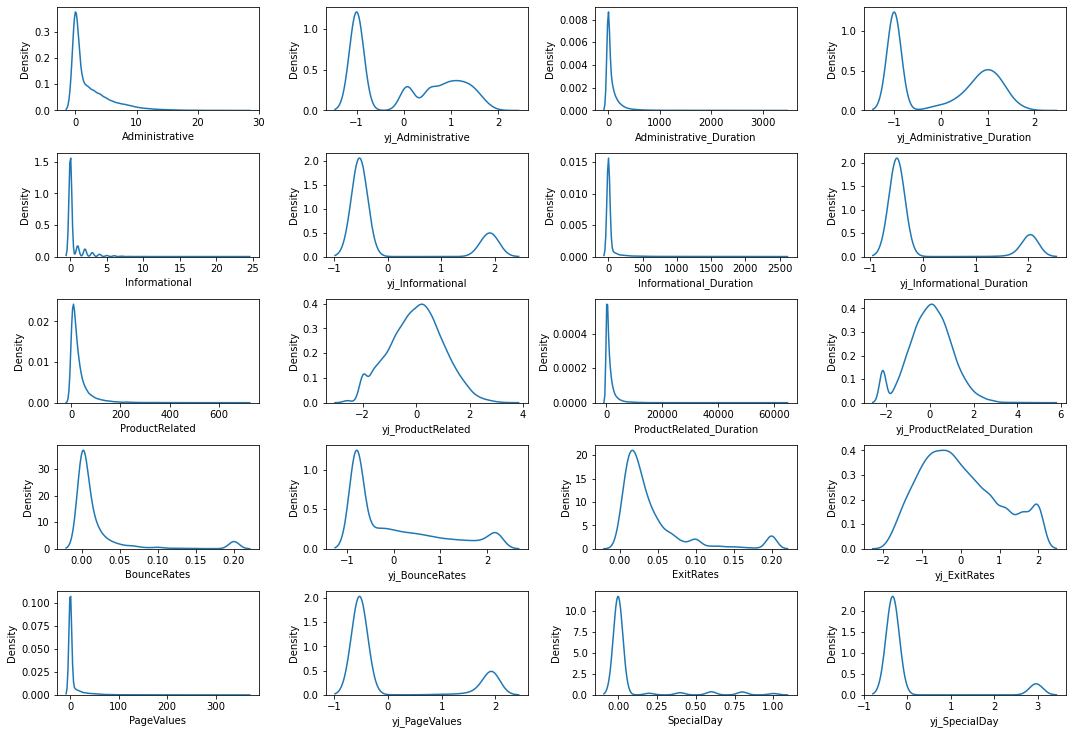

In [30]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_yeo_jo, x=nums_yj[i])

    plt.tight_layout()

In [31]:
df_ol_shop_yeo_jo[nums_yj].describe()

,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
count,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04
mean,4.748889e-15,-2.088311e-15,1.974951e-15,-6.286364e-15,-8.359102e-16,-4.367757e-16,2.428791e-15,-9.520356e-17,-6.609470e-15,4.478370e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-2.580459e+00,-2.168082e+00,-8.029476e-01,-1.811469e+00,-5.328007e-01,-3.376299e-01
25%,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-6.460268e-01,-6.320189e-01,-8.029476e-01,-7.637588e-01,-5.328007e-01,-3.376299e-01
50%,7.440136e-02,1.030641e-01,-5.238515e-01,-4.947987e-01,2.542071e-02,1.985934e-02,-4.793771e-01,-1.694811e-01,-5.328007e-01,-3.376299e-01
75%,1.028024e+00,9.744059e-01,-5.238515e-01,-4.947987e-01,6.782554e-01,6.527018e-01,6.366262e-01,7.206251e-01,-5.328007e-01,-3.376299e-01
max,1.978077e+00,2.015436e+00,1.993723e+00,2.077830e+00,3.374537e+00,5.338706e+00,2.219446e+00,2.011278e+00,1.979914e+00,2.972664e+00


#### E. Feature encoding

In [32]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_feature_encoding = df_ol_shop_yeo_jo.copy()
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
6125,Oct,2,2,1,1,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,1.561319,1.132164,-0.330270,0.029550,-0.532801,-0.33763
6124,Aug,2,5,5,2,New_Visitor,True,False,1.171179,0.820270,-0.523851,-0.494799,-1.366868,-1.495086,-0.802948,0.200527,-0.532801,-0.33763
3677,May,3,2,1,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.439318,-0.292997,0.863389,-0.452583,-0.532801,-0.33763
5453,Sep,2,2,6,3,New_Visitor,False,False,0.074401,-0.116945,-0.523851,-0.494799,0.526017,-0.179935,-0.802948,-1.308826,-0.532801,-0.33763
7677,Oct,2,2,3,4,Returning_Visitor,False,False,0.074401,0.856619,-0.523851,-0.494799,0.025421,-0.406348,1.324645,0.462649,-0.532801,-0.33763


##### Label Encoding untuk Fitur Kategorikal

In [33]:
for col in cats:
    print('column:', col, df_ol_shop_feature_encoding[col].value_counts())

column: OperatingSystems 2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
column: Browser 2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
column: TrafficType 2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
column: Month May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    10431
New_Visitor           1693
Other                  

#### One Hot Encoding untuk fitur VisitorType

In [34]:
ohe_visitor_type = pd.get_dummies(df_ol_shop_feature_encoding['VisitorType'], prefix='visitor_type', drop_first=True, )

# print(ohe_visitor_type)
df_ol_shop_feature_encoding = df_ol_shop_feature_encoding.join(ohe_visitor_type)

df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
11852,Nov,1,1,3,3,Returning_Visitor,True,False,-0.998474,-1.005468,-0.523851,-0.494799,0.071770,-0.036655,-0.802948,0.053157,-0.532801,-0.33763,0,1
3997,May,2,2,3,4,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.025421,0.253018,1.669170,1.076304,-0.532801,-0.33763,0,1
2486,May,3,2,4,11,Returning_Visitor,False,False,1.282480,1.105636,1.807721,1.922825,0.958707,0.133039,-0.663055,-1.306804,1.761703,-0.33763,0,1
8650,Dec,2,2,8,2,Returning_Visitor,False,True,0.834177,1.094841,-0.523851,-0.494799,0.469132,0.916762,-0.802948,-0.283082,1.752642,-0.33763,0,1
10238,Nov,2,2,1,1,Returning_Visitor,False,True,-0.998474,-1.005468,-0.523851,-0.494799,2.046241,2.089000,-0.013593,-0.259034,1.541156,-0.33763,0,1


#### Label Encoding untuk Fitur Weekend, Month

In [35]:
mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}



df_ol_shop_feature_encoding['Weekend'] = df_ol_shop_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_feature_encoding['Month'] = df_ol_shop_feature_encoding['Month'].map(mapping_month)
# df_ol_shop_feature_encoding['OperatingSystems'] = df_ol_shop_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
# df_ol_shop_feature_encoding['Browser'] = df_ol_shop_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
# df_ol_shop_feature_encoding['TrafficType'] = df_ol_shop_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
9388,11,2,5,9,10,Returning_Visitor,1,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,-0.819385,1.877254,1.452513,-0.532801,-0.33763,0,1
428,3,2,2,3,1,Returning_Visitor,0,False,0.550281,0.712439,-0.523851,-0.494799,-0.551772,-0.949908,-0.802948,-0.528649,-0.532801,-0.33763,0,1
8619,12,2,2,3,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.469132,0.746807,1.163226,1.242395,-0.532801,-0.33763,0,1
6965,9,3,2,1,4,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,0.358245,0.133598,0.121971,-0.532801,-0.33763,0,1
7802,8,2,2,6,1,Returning_Visitor,1,False,1.028024,0.795056,1.992722,2.073487,1.057047,0.541683,0.652176,0.281162,-0.532801,-0.33763,0,1


In [36]:
df_ol_shop_feature_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

#### Fitur Encoding untuk fiture OS, browser type, traffic type

In [37]:
def map_operating_system_type(data):
    if(data['OperatingSystems'] == 1):
        return 0
    elif(data['OperatingSystems'] == 3):  
        return 1
    elif(data['OperatingSystems'] == 4):  
        return 2
    else:
        return 3

def map_browser_type(data):
    if(data['Browser'] == 1):
        return 0
    elif(data['Browser'] == 4):  
        return 1
    elif(data['Browser'] == 5):  
        return 2
    elif(data['Browser'] == 6):  
        return 3
    elif(data['Browser'] == 10):  
        return 4
    elif(data['Browser'] == 8):  
        return 5
    elif(data['Browser'] == 3):  
        return 6
    elif(data['Browser'] == 7):  
        return 7
    elif(data['Browser'] == 13):  
        return 8
    else:
        return 9


def map_traffic_type(data):
    if(data['TrafficType'] == 1):
        return 0
    elif(data['TrafficType'] == 3):  
        return 1
    elif(data['TrafficType'] == 4):  
        return 2
    elif(data['TrafficType'] == 13):  
        return 3
    elif(data['TrafficType'] == 10):  
        return 4
    elif(data['TrafficType'] == 6):  
        return 5
    elif(data['TrafficType'] == 8):  
        return 6
    elif(data['TrafficType'] == 5):  
        return 7
    elif(data['TrafficType'] == 11):  
        return 8
    elif(data['TrafficType'] == 20):  
        return 9
    else:
        return 10



#### F. Handle class imbalance

In [38]:
df_ol_shop_feature_encoding['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

#### Distribusi nilai unik pada target mengalami ketimpangan, sehingga perlu dilakukan handling class imbalance 

Memisahkan data fitur dengan label

In [39]:
x = df_ol_shop_feature_encoding[[col for col in df_ol_shop_feature_encoding.columns if col not in ['VisitorType','Revenue']]].values
y = df_ol_shop_feature_encoding['Revenue'].values

Split untuk data training dan test

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

##### Over Sampling

In [41]:
x_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(random_state=123).fit_resample(x_train, y_train)

In [42]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     8268
dtype: int64


#### Karena nilai unik target mengalami ketimpangan yang cukup jauh, maka dilakukan Handling Class Imbalance dengan cara melakukan Oversampling dengan menggunakan SMOTE pembagian rasio 50-50

***
## **2. Feature Engineering**
***

**Import library**

In [43]:
# import library
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

**Split Features and Target**

In [44]:
# split feature and target

# features
X = df_ol_shop_feature_encoding.drop(['Revenue'], axis=1)
# target
y = df_ol_shop_feature_encoding['Revenue'].copy()

**Pengelompokan feature setelah dilakukan Transformasi dan Encoding**

In [45]:
# pengelompokan kolom berdasarkan jenisnya

dnums = ['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay']

dcats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month',
        'visitor_type_Other','visitor_type_Returning_Visitor', 'Weekend']

nums_target =['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
                       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
                       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay', 'Revenue']

**Korelasi Features numerical terhadap target**

<AxesSubplot:>

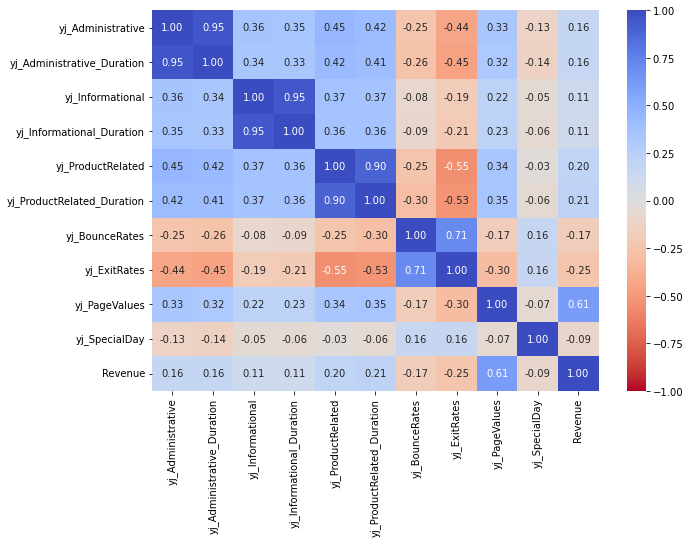

In [46]:
# ploting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_ol_shop_feature_encoding[nums_target].corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

***
### **2.A Feature selection**

Kategori features yang bisa di-drop dari hasil Univariate dan Multivariate analysis adalah sbb : <br>

1. Feature kategorikal yg hanya punya 1 atau 2 data yg dominan  --> Browser dan Region <br>
2. Feature kategorical dengan jumlah nilai unique nya banyak  --> TrafficType. Untuk type ini akan dilakukan Thershold untuk mengurangi jumlah nunique- nya.<br>
3. Salah satu dari 2 feature yang berkorelasi dengan nilai > 0.7 (redundant) --> ExitRate <br>

Asumsi awal features yang berpeluang untuk di-drop adalah : **Browser, Region, ExitRate**

**Asumsi** ini akan dicoba dilakukan **validasi** dengan **metode feature selection** dibawah.

#### **2.A.1 Feature selection for Numerical data**

**REDUNDANT FEATURES**

premis : jika 2 feature berkorelasi dengan nilai > 0.7 maka feature tersebut redundant dan bisa di-drop salah satunya

In [47]:
# function to get features correlation with threshold > 0.7

def correlation(dataset, threshold):
    col_corr = [] 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr 

corr_features = correlation(df_ol_shop_feature_encoding[dnums], 0.7)
corr_features

['yj_Administrative_Duration',
 'yj_Informational_Duration',
 'yj_ProductRelated_Duration',
 'yj_ExitRates']

***
Feature **ExitRates** berkorelasi  dengan **BounceRates** dengan nilai diatas 0.7 sehingga masuk kategori redundant feature. <br>
**Tiap Page Duration** berkorelasi kuat dengan **masing-masing page**. Namun feature2 ini akan dilakukan feature extraction pada point 2.B.<br>
***

**ANOVA f-test Feature Selection**

Method ini cocok untuk tipe data features numerical denga target berupa categorial

Feature yj_Administrative : 338.874
Feature yj_Administrative_Duration : 338.578
Feature yj_Informational : 152.135
Feature yj_Informational_Duration : 143.686
Feature yj_ProductRelated : 492.61
Feature yj_ProductRelated_Duration : 569.296
Feature yj_BounceRates : 374.634
Feature yj_ExitRates : 812.582
Feature yj_PageValues : 7292.268
Feature yj_SpecialDay : 95.393


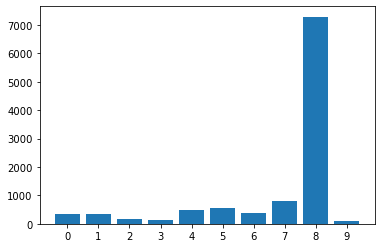

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X[dnums], y)

# transform train input data
X_fs = fs.transform(X[dnums])

# what are scores for the features
for i in range(len(dnums)):
     print(f'Feature {dnums[i]} : {round(fs.scores_[i],3)}')

# plot the scores
pyplot.bar([i for i in range(len(dnums))], fs.scores_)
pyplot.xticks (np.arange(0, 10, step=1))
pyplot.show()

***
Dari hasil ANOVA f-test Feature Selection terlihat bahwa feature **PageValue** adalah fitur yang paling relevan. <br>
Hal ini karena Page value merupakan nilai rata-rata untuk page yang dikunjungi pengguna sebelum menyelesaikan transaksi yang menghasilkan revenue.

Feature-feature lain tersebar dengan nilai relevansi yang tidak jauh berbeda. <br>
***

**MUTUAL INFORMATION**

premis : semakin tingggi nilai mutual info maka semakin penting feature tersebut

In [49]:
# determine the mutual information
mutual_info = mutual_info_classif(X[dnums], y)
mutual_info

array([0.01859386, 0.01375653, 0.00636324, 0.00695428, 0.01982505,
       0.03116492, 0.0247194 , 0.0430034 , 0.16250757, 0.00646196])

In [50]:
# ordering the features
mutual_info = pd.Series(mutual_info)
mutual_info.index = X[dnums].columns
mutual_info.sort_values(ascending=False)

yj_PageValues                 0.162508
yj_ExitRates                  0.043003
yj_ProductRelated_Duration    0.031165
yj_BounceRates                0.024719
yj_ProductRelated             0.019825
yj_Administrative             0.018594
yj_Administrative_Duration    0.013757
yj_Informational_Duration     0.006954
yj_SpecialDay                 0.006462
yj_Informational              0.006363
dtype: float64

<AxesSubplot:>

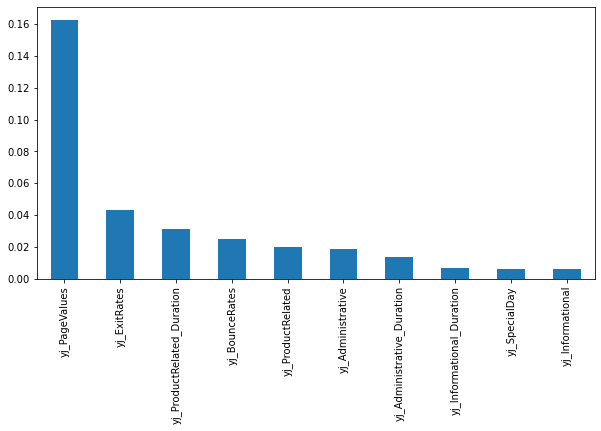

In [60]:
# plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))

***
feature dengan nilai mutual_info terendah  adalah **SpecialDay**. Feature ini mempunyai nilai korelasi terhadap target sebesar -0.09 pada plot heatmap. <br>
Sedangkan untuk feature **Informational** akan dilakukan feature extraction pada 2.B

| **Asumsi Awal**     | **Konfirmasi**|
|----------------------- |------------- |
|Browser | |
|Region  |        |
|ExitRates | ExitRate|
| | SpecialDay|

***

#### **2.A.1 Feature selection for Categoricals data**

**Define Hypothesis**

Null Hypothesis (H0): feature tidak berkorelasi terhadap target.

Alternate Hypothesis (H1): feature berkorelasi terhadap target.

In [52]:
from sklearn.feature_selection import chi2

In [61]:
chi_scores = chi2(X[dcats],y)

***
#### **KESIMPULAN**

Dari Analisa diatas maka disimpulkan bahwa : <br>
1. Feature numerik yang akan di drop adalah : **ExitRates**. <br>
2. Feature **Special Day** dengan nilai mutual_info terendah untuk sementara akan di-keep untuk melihat pengaruhnya pada pemodelan machine learning.
2. Feature kategorical yang akan di drop adalah : .........



***

#### **DROP FEATURE PADA DATAFRAME**

In [64]:
# droping features
df_select = df_ol_shop_feature_encoding.drop(['yj_ExitRates'], axis=1)

df_select.head(3)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
0,2,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,0,1
1,2,2,2,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,-0.532801,-0.33763,0,1
2,2,4,1,9,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,0,1


***
### **2.B Feature extraction**

#### **2.B.1 Total Visit**

Merupakan Total jumlah page yang dikunjungi per masing-masing sesi

In [65]:
# Total durasi kunjungan per masing-masing sesi
df_ex = df_select.copy()
df_ex['totalPage_visit'] = df_ex['yj_Administrative'] + df_ex['yj_Informational'] + df_ex ['yj_ProductRelated']


In [66]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit
8397,11,3,2,1,1,Returning_Visitor,0,True,1.171179,1.015881,1.953214,1.954424,2.399208,2.361618,-0.203113,-0.532801,-0.33763,0,1,5.523601
9169,12,2,2,9,2,New_Visitor,1,True,0.550281,0.800462,-0.523851,-0.494799,-0.074970,0.508862,-0.802948,1.978423,-0.33763,0,0,-0.048540
8181,11,1,1,1,2,Returning_Visitor,0,False,1.610879,1.619556,1.979993,1.945359,1.622723,1.668188,0.653506,1.679178,-0.33763,0,1,5.213594
7201,7,2,2,4,13,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,0,1,-3.498917
837,3,2,2,6,1,Returning_Visitor,0,False,-0.998474,-1.005468,1.807721,2.008424,-0.129623,0.216189,1.140602,-0.532801,-0.33763,0,1,0.679624


#### **2.B.2 Total Duration**

Total durasi kunjungan per masing-masing sesi

In [67]:
# Total durasi kunjungan per masing-masing sesi
df_ex['total_duration'] = df_ex['yj_Administrative_Duration'] + df_ex['yj_Informational_Duration'] + df_ex ['yj_ProductRelated_Duration']

In [68]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration
5137,5,2,2,4,2,Returning_Visitor,0,False,1.753252,1.203689,...,2.072496,1.524338,0.844427,-0.548308,1.622774,-0.33763,0,1,5.270675,4.120612
6246,7,2,2,3,4,Returning_Visitor,0,True,0.074401,0.006150,...,1.954424,-0.023399,1.008346,-0.802948,-0.532801,-0.33763,0,1,2.004216,2.968920
2481,5,2,2,4,6,Returning_Visitor,1,False,-0.998474,-1.005468,...,-0.494799,0.071770,0.329615,0.582226,-0.532801,-0.33763,0,1,-1.450556,-1.170652
1602,3,3,2,3,3,Returning_Visitor,0,False,-0.998474,-1.005468,...,-0.494799,-0.187754,-0.656468,-0.802948,-0.532801,-0.33763,0,1,-1.710080,-2.156735
4617,5,2,2,4,1,Returning_Visitor,0,False,0.834177,0.664971,...,2.044194,0.553196,0.213726,-0.166625,-0.532801,2.97265,0,1,3.340587,2.922891


#### **2.B.3 Rasio (Duration/Page)**

In [69]:
df_ex['adm_rasio'] = df_ex['yj_Administrative_Duration'] / df_ex['yj_Administrative']
df_ex['info_rasio'] = df_ex['yj_Informational_Duration'] / df_ex['yj_Informational']
df_ex['product_rasio'] = df_ex['yj_ProductRelated_Duration'] / df_ex['yj_ProductRelated']

df_ex['adm_rasio'] = df_ex['adm_rasio'].fillna(0)
df_ex['info_rasio'] = df_ex['info_rasio'].fillna(0)
df_ex['product_rasio'] = df_ex['product_rasio'].fillna(0)

df_ex.head(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
0,2,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.219446,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
1,2,2,2,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,...,-0.802948,-0.532801,-0.33763,0,1,-3.142966,-2.615427,1.007005,0.94454,0.688098
2,2,4,1,9,3,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.219446,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
3,2,3,2,2,4,Returning_Visitor,0,False,-0.998474,-1.005468,...,1.772681,-0.532801,-0.33763,0,1,-3.142966,-3.439203,1.007005,0.94454,1.196401
4,2,3,3,1,4,Returning_Visitor,1,False,-0.998474,-1.005468,...,0.827019,-0.532801,-0.33763,0,1,-1.988715,-1.460985,1.007005,0.94454,-0.084225


***
### **2.C Feature tambahan**

1. Customer ID - Data memiliki unique value dan bisa diketahui dan dilakukan tracing perilaku konsumen dan transaksi berulang
2. Returning Page - Untuk dapat mengetahui page-page mana yang dibuka berulang kali, hal ini menandakan ketertarikan konsumen pada page tersebut
3. Seller Reputation - Asumsinya reputasi seller akan berpengaruh pada minat beli dan keputusan beli
4. Satisfaction Score - untuk mengetahui kepuasan terhadap transaksi di web dan kaitannya apakah dapat meningkatkan revenue
5. Product in Basket - fitur ini dapat mengetahui user yang memiliki minat beli namun belum melakukan transaksi.
6. Gender - Fitur ini bertujuan untuk mengetahui sebaran revenue per masing-masing Jenis kelamin user